In [1]:
import sys
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
import lightning.pytorch as pl
from pytorch_lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger
import tensorboard

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the root directory
root_directory = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the system path
sys.path.append(root_directory)

# Verify the path addition
from helper_utils import *
from U_Net import *
import U_Net_helper_functions
from TIF_dataset import *
from pytorch_lightning.loggers import TensorBoardLogger

In [2]:
image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\imgs")
label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\labels")

image_paths =  list_files_in_folder(image_folder_paths)
label_paths =  list_files_in_folder(label_folder_paths)

In [3]:
dataset = TIF_dataset(image_paths, label_paths)

In [5]:
#train with pytorch lightning

sizes = [1, 8, 16, 32, 64, 128]
train_dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

logger = TensorBoardLogger("logs", name="U_Net")

lightning_model = UNet(sizes, kernel_size=5, padding = 2)

# trainer = pl.Trainer(max_epochs=3, logger=logger)
trainer = pl.Trainer(max_epochs=1)

trainer.fit(model = lightning_model, train_dataloaders=train_dataloader)

# %load_ext tensorboard
# %tensorboard --logdir logs

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                | Params
-----------------------------------------------------
0 | bottom_path  | ModuleList          | 1.4 M 
1 | top_path     | ModuleList          | 545 K 
2 | UpConvs      | ModuleList          | 87.5 K
3 | pool         | MaxPool2d           | 0     
4 | bottom_block | Convolutional_Block | 1.2 M 
5 | loss_fn      | CrossEntropyLoss    | 0     
-----------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.915    Total estimated model params size (MB)
c:\Users\Komputer\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasin

Epoch 0: 100%|██████████| 46/46 [00:25<00:00,  1.79it/s, v_num=16]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 46/46 [00:26<00:00,  1.75it/s, v_num=16]


Model output


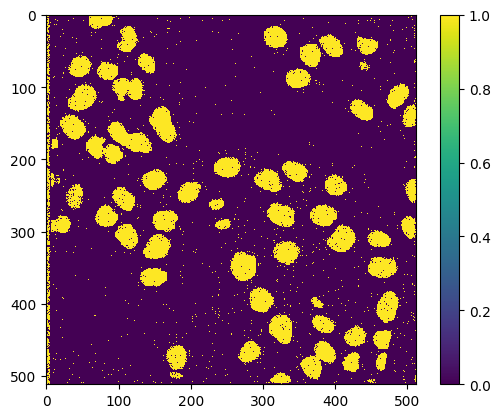

Label


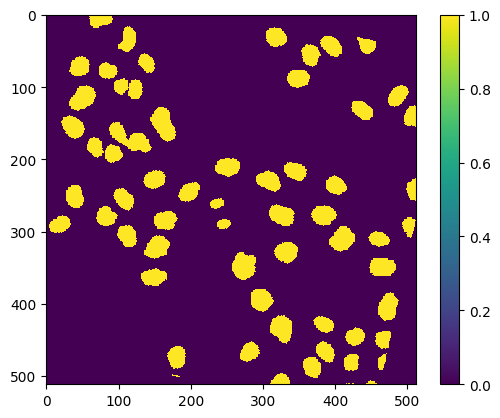

original image


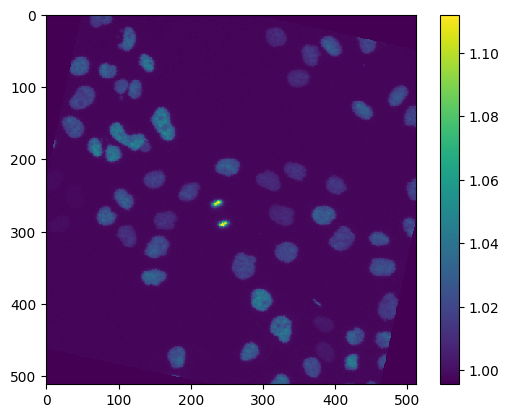

In [6]:
data, label = dataset[164]


output = lightning_model(data.unsqueeze(dim = 0))
model_return_numpy = channel_comparison(output)
print('Model output')
plot_heatmap(model_return_numpy)
print('Label')
plot_heatmap(label.squeeze().numpy())
print('original image')
plot_heatmap(data.squeeze().numpy())